# **Optimizing DBSCAN Clustering on Wholesale Customers Data**

> This project applies DBSCAN clustering to the Wholesale Customers dataset. It preprocesses the data by transforming and scaling the continuous features, retains the categorical columns, and then runs an exhaustive grid search over DBSCAN parameters (eps and min_samples) using the silhouette score to evaluate and select the best clustering configuration.




In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

In [ ]:
df = pd.read_csv('Wholesale-customers-data.csv', sep=',', header=0)
dropped_columns = df[['Channel', 'Region']]
remain_columns = df.drop(columns=['Channel', 'Region'], axis=1)
pt = PowerTransformer()
header = remain_columns.columns.to_list()
remain_columns = pt.fit_transform(remain_columns)
mms = MinMaxScaler()
remain_columns = mms.fit_transform(remain_columns)
remain_columns = pd.DataFrame(remain_columns, columns=header)
X = pd.concat([dropped_columns,remain_columns], axis=1)

In [ ]:
db = DBSCAN()
y_db = db.fit_predict(X)
print('defult values for min_samples and eps are: ' + str(db.min_samples) + ' and ' + str(db.eps))

defult values for min_samples and eps are: 5 and 0.5


([<matplotlib.patches.Wedge at 0x794fd430c290>,
 [Text(0.7999095385908265, 0.7550792872747942, '0'),
  Text(-1.0926978822431568, 0.12653591640842662, '1'),
  Text(0.2744798944170762, -1.065204575450552, '2'),
  Text(0.794447995987203, -0.7608234891694113, '3'),
  Text(0.9630194271036546, -0.5315953188478516, '4'),
  Text(1.0807528641286013, -0.20487373349901455, '5')])

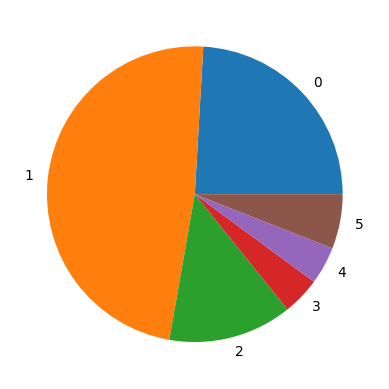

In [ ]:
n = np.unique(y_db[y_db != -1],return_counts=True)
plt.pie(n[1], labels=n[0])

In [ ]:
param_grid = {'eps': list(np.arange(0.01, 1, 0.05)), 'min_samples': list(np.arange(2,11,1))}
params = list(ParameterGrid(param_grid))
silhouette_scores = []
dbscan_out = pd.DataFrame(columns=['eps', 'min_samples', 'silhouette_score', 'n_clusters'])

In [ ]:
for i in params:
  db = DBSCAN(**i)
  y_db = db.fit_predict(X)
  clusters = np.unique(y_db[y_db != -1])
  n_cluster = len(clusters)
  if n_cluster>1 and n_cluster<len(y_db):
    score = silhouette_score(X, y_db)
    silhouette_scores.append(score)
    dbscan_out.loc[len(dbscan_out)] = [db.eps, db.min_samples, score, n_cluster]
